# 개인 프로젝트 예시


## OPEN API를 활용한 네이버 뉴스 텍스트 분석
- 1. 네이버 오픈 API로 기사 URL 크롤링
- 2. bs4 + selenium으로 기사 제목 및 내용 크롤링

In [1]:
import os
import sys
import urllib.request
import requests

news_data = []
page_count = 20

client_id = "rHQTQEJtVxSGDMOZ2QoC"
client_secret = "7qN8TAYhzh"

encText = urllib.parse.quote("롯데")

for idx in range(page_count):
    # json 결과
    url = "https://openapi.naver.com/v1/search/news?query=" + encText + "&start=" + str(idx * 10 + 1)
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if(rescode==200):
    #    response_body = response.read()
        result = requests.get(response.geturl(),
                              headers={"X-Naver-Client-Id":client_id,
                                       "X-Naver-Client-Secret":client_secret}
                             )
        news_data.append(result.json())
    #    print(response_body.decode('utf-8'))
    else:
        print("Error Code:" + rescode)

### 크롤링한 데이타 살펴보기

- 온라인 json 뷰어 이용하기 : http://jsonviewer.stack.hu/

In [2]:
print(news_data)

05&oid=031&aid=0000587841', 'description': '열혈 응원 이벤트는 이용자가 응원하는 프로구단의 2021시즌 기대 등수와 응원 메시지를 공식포럼에 남기면, 추첨을 통해 최원준(KIA), 소형준(KT), 임찬규(LG), 한유섬(SSG), 허경민(두산), 김원중(<b>롯데</b>), 원태인(삼성)... ', 'pubDate': 'Fri, 12 Mar 2021 11:29:00 +0900'}, {'title': "'나혼자 산다' 900만 시대... 소형 아파트 거래 46% 증가", 'originallink': 'http://www.meconomynews.com/news/articleView.html?idxno=51154', 'link': 'http://www.meconomynews.com/news/articleView.html?idxno=51154', 'description': '부산 주요 상권인 온천장 상권과 부산대 앞 상권을 동시에 이용할 수 있고 허심청, 홈플러스, CGV, <b>롯데</b>백화점, <b>롯데</b>시네마, NC백화점 등도 가깝다. 금정산이 단지와 인접해 주거환경이 쾌적하며 금강공원... ', 'pubDate': 'Fri, 12 Mar 2021 11:28:00 +0900'}, {'title': "하석주 <b>롯데</b>건설 대표, MZ세대 소통 위해 '주니어 보드' 신설", 'originallink': 'http://www.meconomynews.com/news/articleView.html?idxno=51141', 'link': 'http://www.meconomynews.com/news/articleView.html?idxno=51141', 'description': '하석주 대표와 20~30대 직원들로 구성 [시장경제=신준혁 기자] 하석주 <b>롯데</b>건설 대표이사(첫 번째 줄 왼쪽에서 네 번째)가 주니어보드 구성원들이 기념 촬영을 하고 있다. 사진=<b>롯데</b>건설 <b>롯데</b>건설은 10일\xa0

In [3]:
# print(news_data)
# print(len(news_data))
# print(news_data[0])
# print(news_data[0]['items'])
# print(len(news_data[0]['items']))
# print(news_data[0]['items'][2])
print(news_data[0]['items'][7]['link'])

http://www.queen.co.kr/news/articleView.html?idxno=354684


[[], [], [], [], [], [], [], [], [], []]


### 네이버 뉴스 하이퍼링크만 리스트로 저장하기

In [4]:
yna_news_link = []

for page in news_data:
    #print(page)
    page_news_link = []
    
    for item in page['items']:
#         print(item)
        temp_link = item['originallink']
#         print(temp_link)
        if "yna" in temp_link:
            page_news_link.append(temp_link)
    
    yna_news_link.append(page_news_link)
        

# 사이트 링크만 가져오기
for page in yna_news_link:
    for link in page:
        print(link)

http://yna.kr/AKR20210312099400005?did=1195m
http://yna.kr/AKR20210312084600051?did=1195m
http://yna.kr/AKR20210312080600007?did=1195m
http://yna.kr/PYH20210312057000013?did=1196m
http://yna.kr/PYH20210312057200013?did=1196m


### 라이브러리 불러오기

In [5]:
import pandas as pd
import numpy as np
from selenium import webdriver
from tqdm import tqdm_notebook
import requests
import pickle
import re
import ast

from selenium import webdriver
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

### 셀레니움을 사용하기 위해 가상 크롬드라이버 다운로드
- 크롬 드라이브 다운로드 : https://chromedriver.chromium.org/downloads

In [6]:
from selenium import webdriver
driver = webdriver.Chrome('./driver/chromedriver')

In [7]:
yna_news_link = [v for v in yna_news_link if v]

In [8]:
print(yna_news_link)

[['http://yna.kr/AKR20210312099400005?did=1195m'], ['http://yna.kr/AKR20210312084600051?did=1195m'], ['http://yna.kr/AKR20210312080600007?did=1195m'], ['http://yna.kr/PYH20210312057000013?did=1196m'], ['http://yna.kr/PYH20210312057200013?did=1196m']]


### 수집한 네이버 뉴스 사이트를 방문하여 뉴스 타이틀과 본문내용 가져오기

In [9]:
yna_news_title = []
yna_news_content = []


for n in tqdm_notebook(range(len(yna_news_link))):
    #print(n)
    news_page_title = []
    news_page_content = []
    
    for idx in tqdm_notebook(range(len(yna_news_link[n]))):        
        
    ########### 긁어온 URL로 접속하기 ############    
        try:
            driver.get(yna_news_link[n][idx])
            print(yna_news_link[n][idx])
            
        except:
            print("Timeout!")
            continue        
        
        try:
            response = driver.page_source
            
        except UnexpectedAlertPresentException:
            driver.switch_to_alert().accept()
            print("게시글이 삭제된 경우입니다.")
            continue
        
        soup = BeautifulSoup(response, "html.parser")
        
        ###### 뉴스 타이틀 긁어오기 ######        
        title = None
        
        try:
            item = soup.find('div', class_="content03")
            title = item.find('h1', class_="tit").get_text()
            #print(title)

        except:
            title = "OUTLINK"
        
        #print(title)
        news_page_title.append(title)
        
        
        ###### 뉴스 본문 긁어오기 ######        
        doc = None
        text = ""
                
        data = soup.find_all("div", {"class" : "story-news article"})
        if data:
            for item in data:

                text = text + str(item.find_all(text=True)).strip()
                text = ast.literal_eval(text)
                doc = ' '.join(text)
   
        else:
            doc = "OUTLINK"
            
        news_page_content.append(doc.replace('\n', ' '))

                
    yna_news_title.append(news_page_title)
    yna_news_content.append(news_page_content)

    time.sleep(2)
    
    
print(yna_news_title[0])
print("==================================")
print(yna_news_content[0])

<ipython-input-9-d34c4741f7df>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(len(yna_news_link))):


  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-9-d34c4741f7df>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx in tqdm_notebook(range(len(yna_news_link[n]))):


  0%|          | 0/1 [00:00<?, ?it/s]

http://yna.kr/AKR20210312099400005?did=1195m


  0%|          | 0/1 [00:00<?, ?it/s]

http://yna.kr/AKR20210312084600051?did=1195m


  0%|          | 0/1 [00:00<?, ?it/s]

http://yna.kr/AKR20210312080600007?did=1195m


  0%|          | 0/1 [00:00<?, ?it/s]

http://yna.kr/PYH20210312057000013?did=1196m


  0%|          | 0/1 [00:00<?, ?it/s]

http://yna.kr/PYH20210312057200013?did=1196m
["[문화소식] 바이올리니스트 힐러리 한, 신보 '파리' 발매"]
["              성도현 기자   기자 페이지           바이올리니스트 양인모 한옥서 연주한 영상 온라인 공개 마포문화재단 '밤섬 부군당 도당굿 오마주'·국립합창단 '모던 타임스'      (서울=연합뉴스) 성도현 기자 = ▲ 바이올리니스트 힐러리 한 '파리' 발매 = 미국 출신의 바이올리니스트 힐러리 한이 세계적인 클래식 음반사 도이체 그라모폰(DG)을 통해 새 앨범 '파리'를 12일 발매했다.               바이올리니스트 힐러리 한의 신보 '파리' 커버   [유니버설뮤직 제공, 재판매 및 DB 금지]          앨범에는 힐러리 한이 미코 프랑크의 지휘로 라디오 프랑스 필하모닉 오케스트라와 함께 연주한 6곡이 담겼다. 라우타바라의 '두 개의 세레나데'와 쇼송의 '시곡', 프로코피예프의 '바이올린 협주곡 1번' 등이다.    21세기 바이올린의 여제로도 불리는 힐러리 한은 17세에 바흐로 데뷔 앨범을 내 '디아파종상'을 받았다. DG에서 11장의 정규 앨범을 냈고, 2019년에는 DG 경쟁사 데카(DECCA)에서 바흐 무반주 바이올린 소나타 앨범을 냈다.     광고            ▲ 바이올리니스트 양인모 한옥 연주 영상 공개 = 바이올리니스트 양인모가 한옥에서 연주한 영상이 12일 오후 6시 유니버설뮤직이 운영하는 유튜브 채널 스튜디오 기와를 통해 공개된다. 유니버설뮤직은 연주자 내한 시 한옥에서 라이브 무대를 꾸며 콘텐츠로 제작하는데, 양인모는 지난달 25일 녹화했다.               바이올리니스트 양인모가 한옥에서 연주하는 모습   [유니버설뮤직 제공, 재판매 및 DB 금지]          양인모는 모리스 라벨의 '치간느'와 로디온 셰드린의 '집시 멜로디'를 선보인다. 이 작품들은 지난 9일 DG에서 발매한 2집 앨범 '현의 유전학'에도 수록됐다.    ▲ 마포

In [10]:
print(yna_news_title[1])

['부산 북항재개발 초고층 생활형 숙박시설 분양 강행…주민 반발']


In [11]:
print(yna_news_content[1])

['              오수희 기자   기자 페이지           조망권 침해 등 난개발 논란 속 롯데 드메르 이달중 분양 예정 주민 "우리 의견 무시, 부산시 업자 손만 들어줘" 분양 중단 및 협의 요구                 부산 북항재개발 레지던스 분양 반대 기자회견   [부산 동구청 제공]          (부산=연합뉴스) 오수희 기자 = 난개발 논란이 있는 부산항 북항 재개발 상업업무지구 내 생활형 숙박시설(레지던스) 분양이 강행되자 주민들이 반발하고 있다. 부산 북항 막개발 반대 시민모임은 12일 부산시청 시민광장에서 기자회견을 열어 "난개발과 조망권 훼손이 우려되는 상업업무지구 D3 구역에 생활형 숙박시설인 롯데 드메르가 이날 분양을 강행한다"며 "즉각 중단돼야 한다"고 주장했다.    이 단체는 "주민이 조망권 훼손 등을 들어 건축계획 변경을 요구하자 부산시와 롯데는 허울 뿐인 민원해소협의체를 만들어 놓고 한 차례 회의를 한 뒤 사업시행자 원안대로 착공하고 분양까지 밀어붙였다"고 지적했다.    이어 "상업업무지구에 레지던스가 무질서하게 들어오면 여러 문제가 발생하는 데 이는 고스란히 주민 피해로 이어진다"며 "주민 의견을 무시하고 건축업자 손만 들어준 부산시 관계자에 엄중히 책임을 물을 것"이라고 덧붙였다.     광고                       부산역 철도시설   [촬영 조정호]          시민모임은 "지난해 4월 오거돈 전 시장이 성추행으로 자진 사퇴한 당일 오후 건축허가가 났고, 변성완 전 시장 권한대행이 사퇴하자마자 착공계를 수리하는 등 관련 행정절차 전반이 의혹 투성이"라고 강조했다.               시민모임은 "부산시는 롯데 드메르 분양이 중단되도록 행정명령을 내리고, 관련 공무원에 대한 특별감사를 해야 한다"고 요구했다.    또 롯데 드메르 측에 "분양을 중단하고 민원해소협의체에서 건축물 높이와 용도변경, 사회적 기여 같은 사항을 두고 성실하게 협의에 임해야 한다"고 촉구했다. 조망권 침해

In [12]:
print(len(yna_news_title))
print(len(yna_news_content))

5
5


### 피클형태로 저장

In [13]:
with open("./data/yna_news_title.pk", "wb") as f:
    pickle.dump(yna_news_title, f)
    
with open("./data/yna_news_content.pk", "wb") as f:
    pickle.dump(yna_news_content, f)

-------------------------------
## 형태소 분석기 제작하기
- 1. 사용할 형태소 분석기 불러오기
- 2. 텍스트 전처리 하기
- 3. 형태소 / POS tagging 하기

### 형태소 불러오기

In [14]:
# from konlpy.tag import Okt
# import re

# okt = Okt()

from konlpy.tag import Mecab
import re

mecab = Mecab()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### 텍스트 전처리

In [18]:
import re


def text_cleaning(doc):
    # 한국어를 제외한 글자를 제거하는 함수.
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", str(doc))
    return doc

def define_stopwords(path):    
    SW = set()
    # 불용어를 추가하는 방법 1)
    # SW.add("있다")
    
    # 불용어를 추가하는 방법 2)
    # stopwords-ko.txt에 직접 추가
    
    with open(path, encoding='cp949') as f:
        for word in f:
            SW.add(word)            
    return SW

def text_tokenizing(doc):    
    # list comprehension을 풀어서 쓴 코드.1)     
#     tokenized_doc = []
    
#     for word in mecab.morphs(doc):
#         if word not in SW and len(word) > 1:
#             tokenized_doc.append(word)
    
#     return tokenized_doc    
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]

In [19]:
text = """5G 이동통신망을 빌려 사용하는 ‘5G 알뜰폰’이 올해 도입되고, 내년부터는 의무화된다.
정부는 알뜰폰 사업자(MNVO)가 통신사(MNO)에 통신망을 빌리는 비용(도매대가)을 지난해보다 큰 폭으로 낮춰, 알뜰폰 요금 인하를 유도하기로 했다. 하지만 줄어드는 알뜰폰 시장을 살릴 수 있을지는 지켜봐야 하는 상황이다.
과학기술정보통신부는 알뜰폰 활성화 추진대책을 25일 발표했다. 알뜰폰 가입자는 800만명으로 이동통신 시장의 12%를 차지한다. 2011년 출시 뒤 저렴한 요금제로 통신비 부담을 낮춰왔다. 하지만 지난해 5월 통신 3사가 준보편제 요금을 내놓은 이후 알뜰폰 이탈 현상이 지속되고 있다.
우선 올해 안에 3개 이상의 5G 알뜰폰이 시장에 나온다. 통신사가 5G망을 알뜰폰 사업자에게 도매 제공할지 여부는 통신사 자율로 정한다. 앞서 LG유플러스는 오는 10월 알뜰폰 사업을 시작하는 KB국민은행에 5G망을 제공한다고 밝힌 바 있다. SK텔레콤와 KT도 특정 제휴사를 선택해 올해 안에 5G 알뜰폰을 내놓기로 했다.
내년부터는 5G 알뜰폰 제공이 의무화된다. 지난 22일자로 종료된 도매제공 의무제도의 유효기간을 2022년 9월22일까지 연장하는 전기통신사업법 개정안이 국회에서 통과되면, 관련 고시를 개정해 SK텔레콤의 5G망 도매제공을 의무화하겠다는 것이다.
과기정통부 관계자는 “SK텔레콤이 자사와 계약을 맺은 13개 알뜰폰 사업자에게 5G망을 의무 제공하면, 그 외 31개의 알뜰폰 사업자들이 경쟁에서 밀릴 것을 우려해 KT와 LG유플러스도 5G망을 제공하게 될 것”이라고 내다봤다.
알뜰폰 사업자가 상품을 만드는 방식 크게 2가지다. 하나는 통신사로부터 음성·문자·데이터를 도매로 사들인 뒤 이를 바탕으로 통신사보다 저렴한 요금제를 내놓는 방식(종량제 도매제공)이다. 이를 위해 정부는 도매대가 인하율을 음성 17.8%, 데이터 19.2%, 단문메시지 1.15%로, 지난해 음성 15.1%, 데이터 19.1%, 단문메시지 1.13%에 비해 높여 잡았다.
또 다른 방식은 일정비용을 통신사에 내고 통신사의 정액 요금제를 그대로 판매하면서, 그 차액의 범위에서 저렴한 요금제를 내놓는 방식(수익배분 도매제공)이다. 정부는 SK텔레콤의 준보편 요금제인 ‘T플랜 요금제’를 알뜰폰 사업자가 재판매할 수 있게 했다. 기존에 SK텔레콤이 도매제공했던 ‘밴드데이터 요금제’의 최고구간의 대가도 1.5%포인트 낮췄다.
알뜰폰 업계는 대체로 반기는 분위기지만, 알뜰폰 시장을 살릴 수 있을지에는 의구심을 갖고 있다. 업계 관계자는 “도매대가 인하율이 크고, 5G망을 제공하는 것은 긍정적”이라면서도 “수익배분 도매제공의 의무화, 설비를 가진 업체에 대한 접속료 정산 도입 등의 제도적 개선이 필요하다”고 말했다."""

In [20]:
SW = define_stopwords("./data/stopwords-ko.txt")
cleand_text = []
for i in range(len(yna_news_content)):
    cleand_text.append(text_cleaning(yna_news_content[i]))
cleaned_text = text_cleaning(text)
print("전처리 결과 : ", cleaned_text)

tokenized_text = text_tokenizing(cleaned_text)
print("\n형태소 분석 결과 : ", tokenized_text)

전처리 결과 :   이동통신망을 빌려 사용하는  알뜰폰이 올해 도입되고 내년부터는 의무화된다정부는 알뜰폰 사업자가 통신사에 통신망을 빌리는 비용도매대가을 지난해보다 큰 폭으로 낮춰 알뜰폰 요금 인하를 유도하기로 했다 하지만 줄어드는 알뜰폰 시장을 살릴 수 있을지는 지켜봐야 하는 상황이다과학기술정보통신부는 알뜰폰 활성화 추진대책을 일 발표했다 알뜰폰 가입자는 만명으로 이동통신 시장의 를 차지한다 년 출시 뒤 저렴한 요금제로 통신비 부담을 낮춰왔다 하지만 지난해 월 통신 사가 준보편제 요금을 내놓은 이후 알뜰폰 이탈 현상이 지속되고 있다우선 올해 안에 개 이상의  알뜰폰이 시장에 나온다 통신사가 망을 알뜰폰 사업자에게 도매 제공할지 여부는 통신사 자율로 정한다 앞서 유플러스는 오는 월 알뜰폰 사업을 시작하는 국민은행에 망을 제공한다고 밝힌 바 있다 텔레콤와 도 특정 제휴사를 선택해 올해 안에  알뜰폰을 내놓기로 했다내년부터는  알뜰폰 제공이 의무화된다 지난 일자로 종료된 도매제공 의무제도의 유효기간을 년 월일까지 연장하는 전기통신사업법 개정안이 국회에서 통과되면 관련 고시를 개정해 텔레콤의 망 도매제공을 의무화하겠다는 것이다과기정통부 관계자는 텔레콤이 자사와 계약을 맺은 개 알뜰폰 사업자에게 망을 의무 제공하면 그 외 개의 알뜰폰 사업자들이 경쟁에서 밀릴 것을 우려해 와 유플러스도 망을 제공하게 될 것이라고 내다봤다알뜰폰 사업자가 상품을 만드는 방식 크게 가지다 하나는 통신사로부터 음성문자데이터를 도매로 사들인 뒤 이를 바탕으로 통신사보다 저렴한 요금제를 내놓는 방식종량제 도매제공이다 이를 위해 정부는 도매대가 인하율을 음성  데이터  단문메시지 로 지난해 음성  데이터  단문메시지 에 비해 높여 잡았다또 다른 방식은 일정비용을 통신사에 내고 통신사의 정액 요금제를 그대로 판매하면서 그 차액의 범위에서 저렴한 요금제를 내놓는 방식수익배분 도매제공이다 정부는 텔레콤의 준보편 요금제인 플랜 요금제를 알뜰폰 사업자가 재판매할 수 있게 했다 기존에 텔레콤이 도매제공했던 

----------------------------
## 피클형태 데이타 읽어와서 빈도 챠트와 워드 클라우드 그리기

### 데이타 전처리와 데이타 불러오기 함수

In [21]:
from tqdm import tqdm_notebook # progress bar
# from konlpy.tag import Okt #Okt 등 형태소 분석기 불러오기
from konlpy.tag import Mecab
import numpy as np
import string # 특수문자
import re
import warnings # 경고 알림 제거
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [22]:
def read_documents(input_file_name):
    """문서들을 주어진 이름의 파일로부터 읽어들여 돌려준다."""
    
    corpus = []
    
    with open(input_file_name, 'rb') as f:
        temp_corpus = pickle.load(f)
        
    for page in temp_corpus:
        corpus += page
    
    return corpus

def text_cleaning(doc):
    # 한국어를 제외한 글자를 제거하는 함수.
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", str(doc))
    return doc

def define_stopwords(path):    
    SW = set()
    # 불용어를 추가하는 방법 1)
    # SW.add("있다")
    
    # 불용어를 추가하는 방법 2)
    # stopwords-ko.txt에 직접 추가
    
    with open(path, encoding='cp949') as f:
        for word in f:
            SW.add(word)            
    return SW


def text_tokenizing(doc):
    return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

In [23]:
input_file_name = "./data/yna_news_content.pk"
documents = read_documents(input_file_name)
documents

["              성도현 기자   기자 페이지           바이올리니스트 양인모 한옥서 연주한 영상 온라인 공개 마포문화재단 '밤섬 부군당 도당굿 오마주'·국립합창단 '모던 타임스'      (서울=연합뉴스) 성도현 기자 = ▲ 바이올리니스트 힐러리 한 '파리' 발매 = 미국 출신의 바이올리니스트 힐러리 한이 세계적인 클래식 음반사 도이체 그라모폰(DG)을 통해 새 앨범 '파리'를 12일 발매했다.               바이올리니스트 힐러리 한의 신보 '파리' 커버   [유니버설뮤직 제공, 재판매 및 DB 금지]          앨범에는 힐러리 한이 미코 프랑크의 지휘로 라디오 프랑스 필하모닉 오케스트라와 함께 연주한 6곡이 담겼다. 라우타바라의 '두 개의 세레나데'와 쇼송의 '시곡', 프로코피예프의 '바이올린 협주곡 1번' 등이다.    21세기 바이올린의 여제로도 불리는 힐러리 한은 17세에 바흐로 데뷔 앨범을 내 '디아파종상'을 받았다. DG에서 11장의 정규 앨범을 냈고, 2019년에는 DG 경쟁사 데카(DECCA)에서 바흐 무반주 바이올린 소나타 앨범을 냈다.     광고            ▲ 바이올리니스트 양인모 한옥 연주 영상 공개 = 바이올리니스트 양인모가 한옥에서 연주한 영상이 12일 오후 6시 유니버설뮤직이 운영하는 유튜브 채널 스튜디오 기와를 통해 공개된다. 유니버설뮤직은 연주자 내한 시 한옥에서 라이브 무대를 꾸며 콘텐츠로 제작하는데, 양인모는 지난달 25일 녹화했다.               바이올리니스트 양인모가 한옥에서 연주하는 모습   [유니버설뮤직 제공, 재판매 및 DB 금지]          양인모는 모리스 라벨의 '치간느'와 로디온 셰드린의 '집시 멜로디'를 선보인다. 이 작품들은 지난 9일 DG에서 발매한 2집 앨범 '현의 유전학'에도 수록됐다.    ▲ 마포문화재단 '밤섬 부군당 도당굿 오마주' = 마포문화재단이 올해 3회째인 '마포 M 국악축제'의 일환으로 지난 8일 연 공연 '밤섬 부군당 도당굿 오

In [24]:
SW = define_stopwords("./data/stopwords-ko.txt")
SW 

{'가\n',
 '가까스로\n',
 '가령\n',
 '각\n',
 '각각\n',
 '각자\n',
 '각종\n',
 '갖고말하자면\n',
 '같다\n',
 '같이\n',
 '개의치않고\n',
 '거니와\n',
 '거바\n',
 '거의\n',
 '것\n',
 '것과 같이\n',
 '것들\n',
 '게다가\n',
 '게우다\n',
 '겨우\n',
 '견지에서\n',
 '결과에 이르다\n',
 '결국\n',
 '결론을 낼 수 있다\n',
 '겸사겸사\n',
 '고려하면\n',
 '고로\n',
 '곧\n',
 '공동으로\n',
 '과\n',
 '과연\n',
 '관계가 있다\n',
 '관계없이\n',
 '관련이 있다\n',
 '관하여\n',
 '관한\n',
 '관해서는\n',
 '구\n',
 '구체적으로\n',
 '구토하다\n',
 '그\n',
 '그들\n',
 '그때\n',
 '그래\n',
 '그래도\n',
 '그래서\n',
 '그러나\n',
 '그러니\n',
 '그러니까\n',
 '그러면\n',
 '그러므로\n',
 '그러한즉\n',
 '그런 까닭에\n',
 '그런데\n',
 '그런즉\n',
 '그럼\n',
 '그럼에도 불구하고\n',
 '그렇게 함으로써\n',
 '그렇지\n',
 '그렇지 않다면\n',
 '그렇지 않으면\n',
 '그렇지만\n',
 '그렇지않으면\n',
 '그리고\n',
 '그리하여\n',
 '그만이다\n',
 '그에 따르는\n',
 '그위에\n',
 '그저\n',
 '그중에서\n',
 '그치지 않다\n',
 '근거로\n',
 '근거하여\n',
 '기대여\n',
 '기점으로\n',
 '기준으로\n',
 '기타\n',
 '까닭으로\n',
 '까악\n',
 '까지\n',
 '까지 미치다\n',
 '까지도\n',
 '꽈당\n',
 '끙끙\n',
 '끼익\n',
 '나\n',
 '나머지는\n',
 '남들\n',
 '남짓\n',
 '너\n',
 '너희\n',
 '너희들\n',
 '네\n',
 '넷\n',
 '년\n',
 '논하지 않다\n',
 '놀라다\n',

In [25]:
cleaned_text = text_cleaning(documents)
cleaned_text

'              성도현 기자   기자 페이지           바이올리니스트 양인모 한옥서 연주한 영상 온라인 공개 마포문화재단 밤섬 부군당 도당굿 오마주국립합창단 모던 타임스      서울연합뉴스 성도현 기자   바이올리니스트 힐러리 한 파리 발매  미국 출신의 바이올리니스트 힐러리 한이 세계적인 클래식 음반사 도이체 그라모폰을 통해 새 앨범 파리를 일 발매했다               바이올리니스트 힐러리 한의 신보 파리 커버   유니버설뮤직 제공 재판매 및  금지          앨범에는 힐러리 한이 미코 프랑크의 지휘로 라디오 프랑스 필하모닉 오케스트라와 함께 연주한 곡이 담겼다 라우타바라의 두 개의 세레나데와 쇼송의 시곡 프로코피예프의 바이올린 협주곡 번 등이다    세기 바이올린의 여제로도 불리는 힐러리 한은 세에 바흐로 데뷔 앨범을 내 디아파종상을 받았다 에서 장의 정규 앨범을 냈고 년에는  경쟁사 데카에서 바흐 무반주 바이올린 소나타 앨범을 냈다     광고             바이올리니스트 양인모 한옥 연주 영상 공개  바이올리니스트 양인모가 한옥에서 연주한 영상이 일 오후 시 유니버설뮤직이 운영하는 유튜브 채널 스튜디오 기와를 통해 공개된다 유니버설뮤직은 연주자 내한 시 한옥에서 라이브 무대를 꾸며 콘텐츠로 제작하는데 양인모는 지난달 일 녹화했다               바이올리니스트 양인모가 한옥에서 연주하는 모습   유니버설뮤직 제공 재판매 및  금지          양인모는 모리스 라벨의 치간느와 로디온 셰드린의 집시 멜로디를 선보인다 이 작품들은 지난 일 에서 발매한 집 앨범 현의 유전학에도 수록됐다     마포문화재단 밤섬 부군당 도당굿 오마주  마포문화재단이 올해 회째인 마포  국악축제의 일환으로 지난 일 연 공연 밤섬 부군당 도당굿 오마주의 영상을 오는 일 오후 시분 유튜브와 네이버에 공개한다 국악축제는 과거와 현재가 만나 미래를 지향한다는 주제로 월과 월 월 월에 열린다                          

In [26]:
tokenized_text = text_tokenizing(cleaned_text)

In [27]:
tokenized_text

['기자',
 '기자',
 '페이지',
 '바이올리니스트',
 '양인모',
 '옥서',
 '연주',
 '영상',
 '온라인',
 '공개',
 '마포',
 '문화',
 '재단',
 '밤섬',
 '부군당',
 '도당굿',
 '오마주',
 '국립합창단',
 '모던',
 '타임스',
 '서울',
 '연합뉴스',
 '기자',
 '바이올리니스트',
 '힐러리',
 '파리',
 '발매',
 '미국',
 '출신',
 '바이올리니스트',
 '힐러리',
 '세계',
 '클래식',
 '반사',
 '도이체',
 '그라모폰',
 '앨범',
 '파리',
 '발매',
 '바이올리니스트',
 '힐러리',
 '신보',
 '파리',
 '커버',
 '유니버설',
 '뮤직',
 '제공',
 '재판매',
 '금지',
 '앨범',
 '힐러리',
 '한이',
 '미코',
 '프랑크',
 '지휘',
 '라디오',
 '프랑스',
 '필하모닉',
 '오케스트라',
 '연주',
 '라우',
 '바라',
 '세레나데',
 '쇼송',
 '시곡',
 '프로코피예프',
 '바이올린',
 '협주곡',
 '세기',
 '바이올린',
 '여제',
 '힐러리',
 '바흐',
 '데뷔',
 '앨범',
 '디아파종',
 '정규',
 '앨범',
 '경쟁사',
 '데카',
 '바흐',
 '무반주',
 '바이올린',
 '소나타',
 '앨범',
 '광고',
 '바이올리니스트',
 '양인모',
 '한옥',
 '연주',
 '영상',
 '공개',
 '바이올리니스트',
 '양인모',
 '한옥',
 '연주',
 '영상',
 '오후',
 '유니버설',
 '뮤직',
 '운영',
 '유튜브',
 '채널',
 '스튜디오',
 '기와',
 '공개',
 '유니버설',
 '뮤직',
 '연주자',
 '한옥',
 '라이브',
 '무대',
 '콘텐츠',
 '제작',
 '양인모',
 '지난달',
 '녹화',
 '바이올리니스트',
 '양인모',
 '한옥',
 '연주',
 '모습',
 '유니버설',
 '뮤직',
 '제공',
 '재판매',
 '금지',
 '양인모',


### NLTK를 이용한 histogram 분석

In [28]:
import nltk
print(len(tokenized_text))

629


In [29]:
from pprint import pprint
text = nltk.Text(tokenized_text, name='naver_news')
print(len(set(tokenized_text)))
pprint(text.vocab().most_common(10))

334
[('기자', 11),
 ('분양', 10),
 ('롯데', 9),
 ('부산', 8),
 ('바이올리니스트', 7),
 ('북항', 7),
 ('시설', 7),
 ('양인모', 6),
 ('밤섬', 6),
 ('앨범', 6)]


### Histogram 그리기

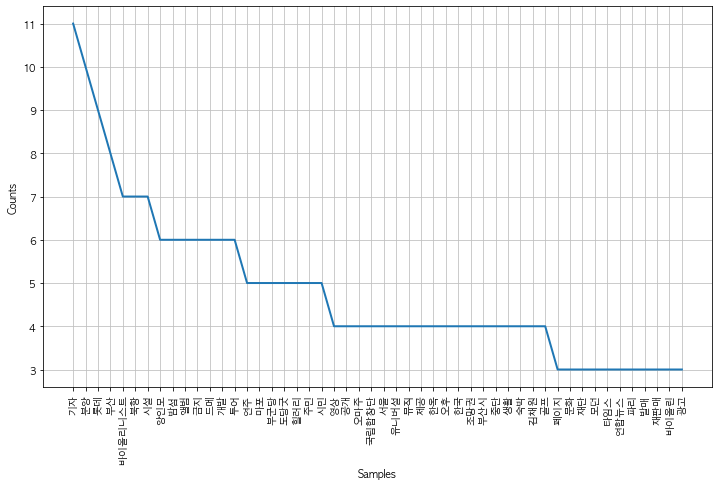

In [41]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = '/Library/Fonts/NanumGothic.ttf'
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(12, 7))
text.plot(50)

### WordCloud 그리기

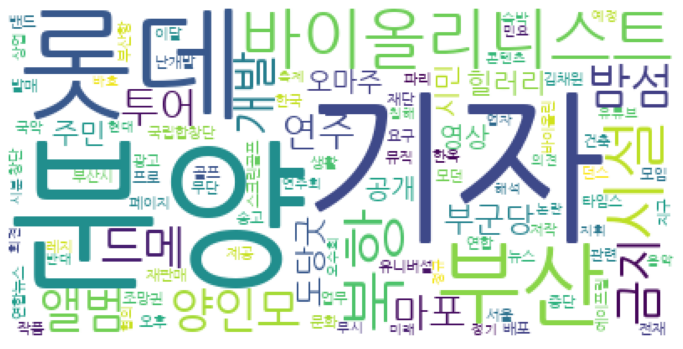

In [40]:
from wordcloud import WordCloud

data = text.vocab().most_common(100)

wordcloud = WordCloud(font_path='/Library/Fonts/NanumGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 원하는 이미지를 이용한 워드 클라우드 그리기

In [141]:
from wordcloud import ImageColorGenerator
import numpy as np
from PIL import Image

mask = np.array(Image.open('heart.jpg'))
image_colors = ImageColorGenerator(mask)

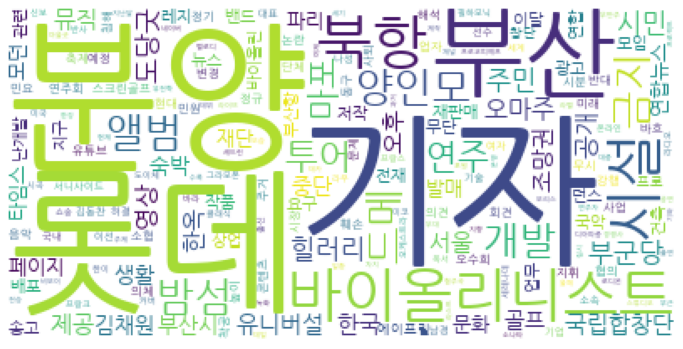

In [39]:
data = text.vocab().most_common(200)


wordcloud = WordCloud(font_path= '/Library/Fonts/NanumGothic.ttf',
    # font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
